# Evaluation Project - 9
Customer Churn Analysis
Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 



    

# Importing Libraries and Data

In [177]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [178]:
churn_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
churn_data.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


# Understanding the Data

In [179]:
# Description of data_set
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [180]:
# Information
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [181]:
a=churn_data[churn_data['TotalCharges']==' '].index

In [182]:
for l in a:
  churn_data['TotalCharges'][l]= 0

In [183]:
for i in range(len(churn_data['TotalCharges'])):
  churn_data['TotalCharges'][i] = pd.to_numeric(churn_data['TotalCharges'][i])

In [184]:
churn_data['TotalCharges'].median()

1394.55

In [185]:
for l in a:
  churn_data['TotalCharges'][l]=churn_data['TotalCharges'].median()

In [186]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EXPLORATORY DATA ANALYSIS

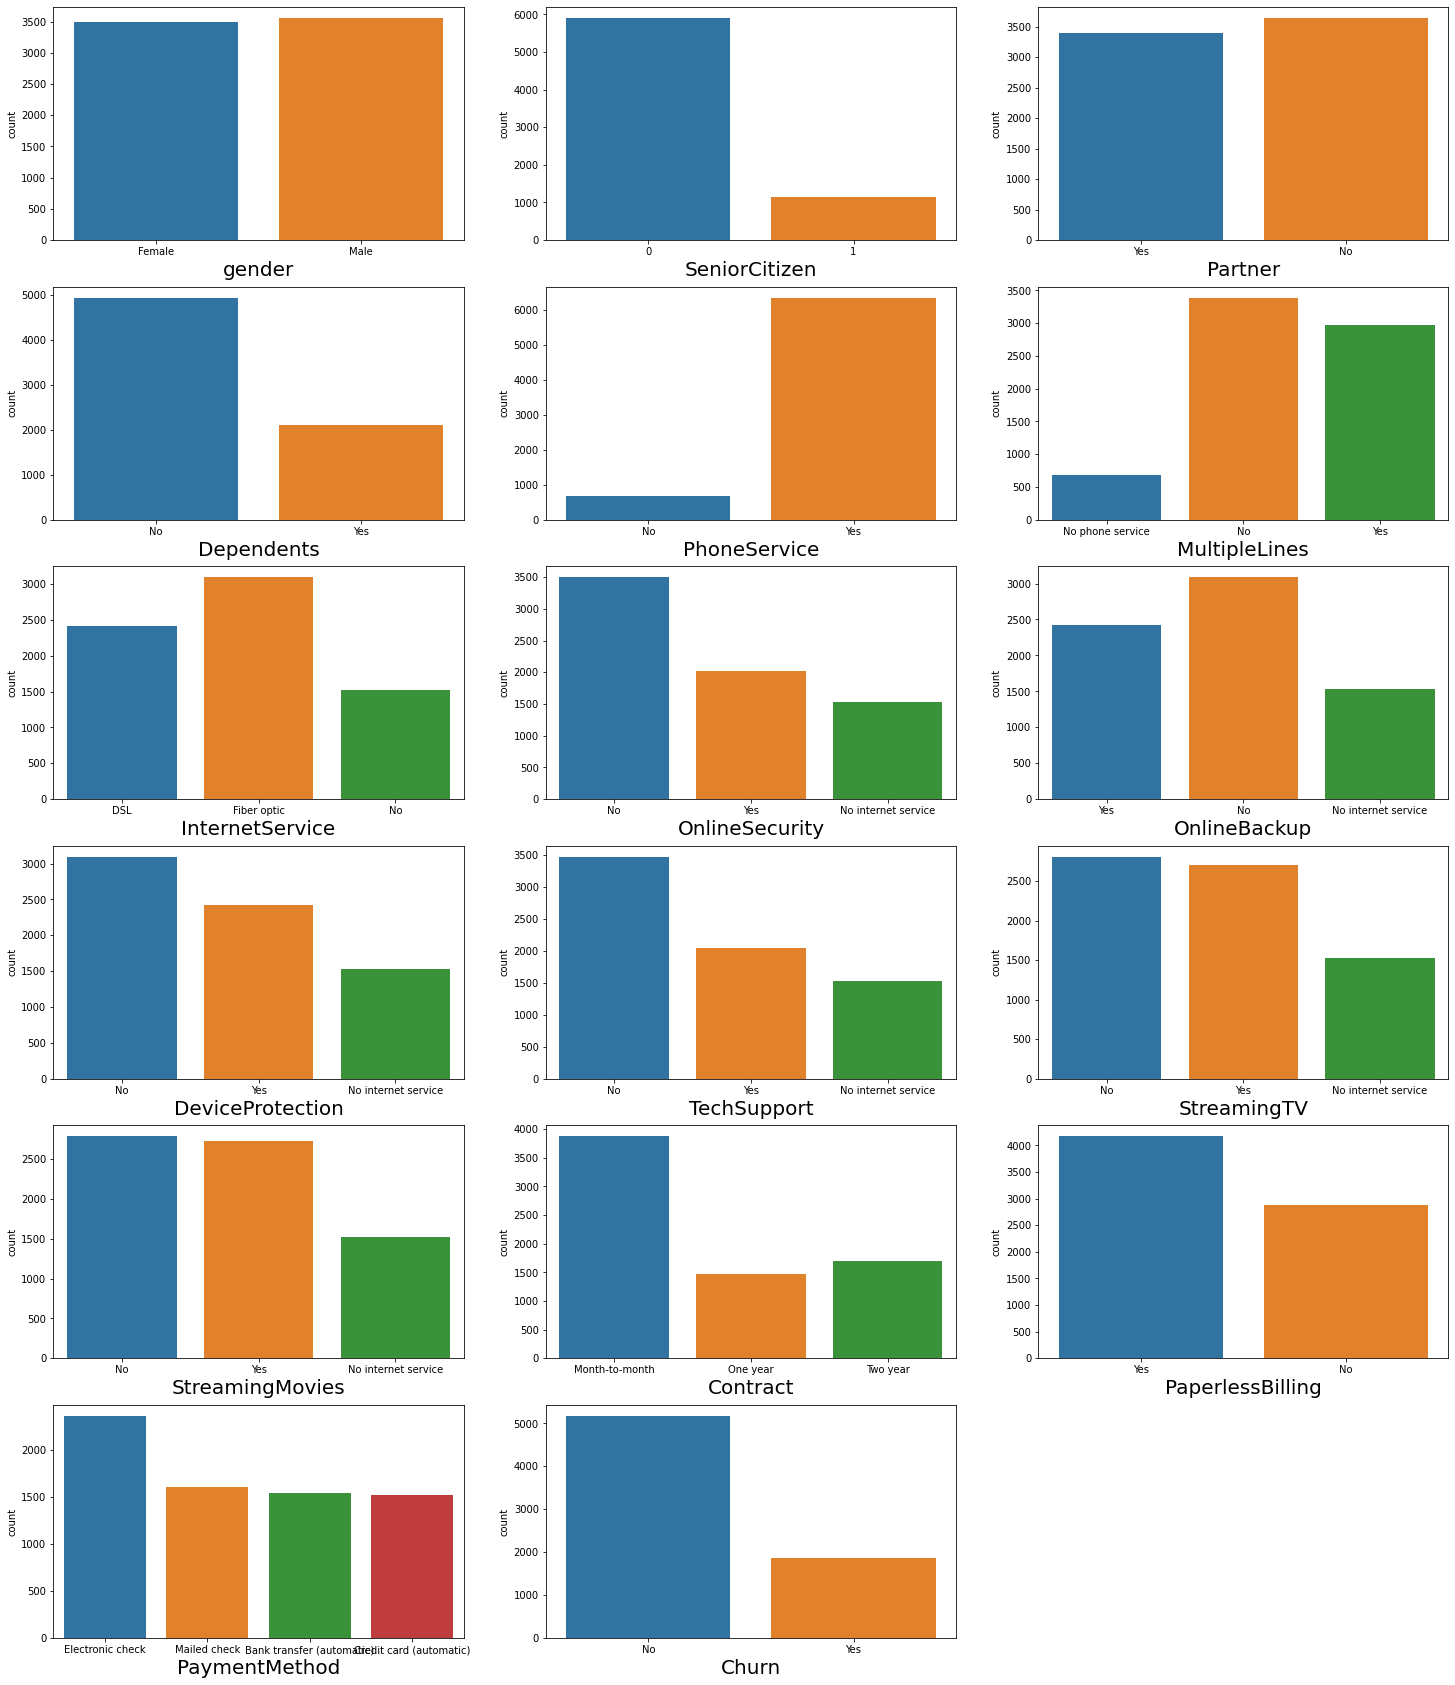

In [187]:
# distribution of data by countplot
plt.figure(figsize = (25,30))
plotnumber = 1

for i in churn_data.drop(['tenure','MonthlyCharges','customerID','TotalCharges'],axis=1).columns:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(x =str(i) , data = churn_data)
        plt.xlabel(i,fontsize=20)
        
    plotnumber +=1
plt.show()

## target column Churn is imbalanced

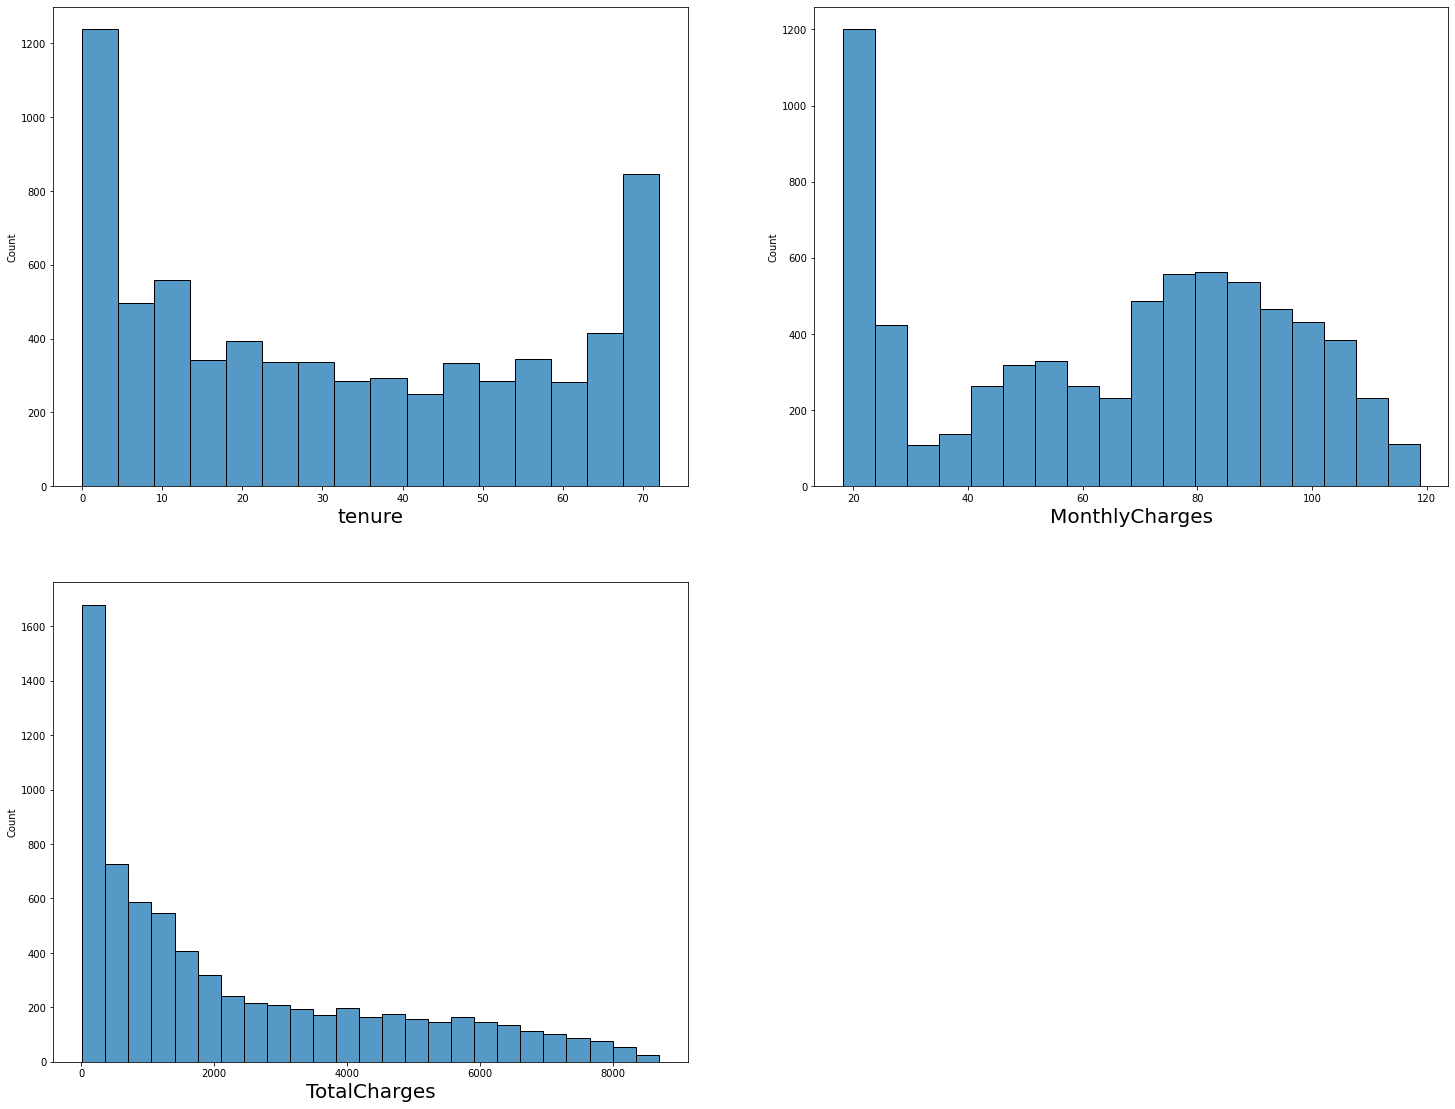

In [188]:
# distribution of data by histogram
plt.figure(figsize = (25,30))
plotnumber = 1
list1=['tenure','MonthlyCharges','TotalCharges']
for i in list1:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x =str(i) , data = churn_data)
        plt.xlabel(i,fontsize=20)
        
    plotnumber +=1
plt.show()

In [189]:
churn_data.drop('customerID',axis=1,inplace=True)

# Multivariate analysis

<Figure size 3600x3600 with 0 Axes>

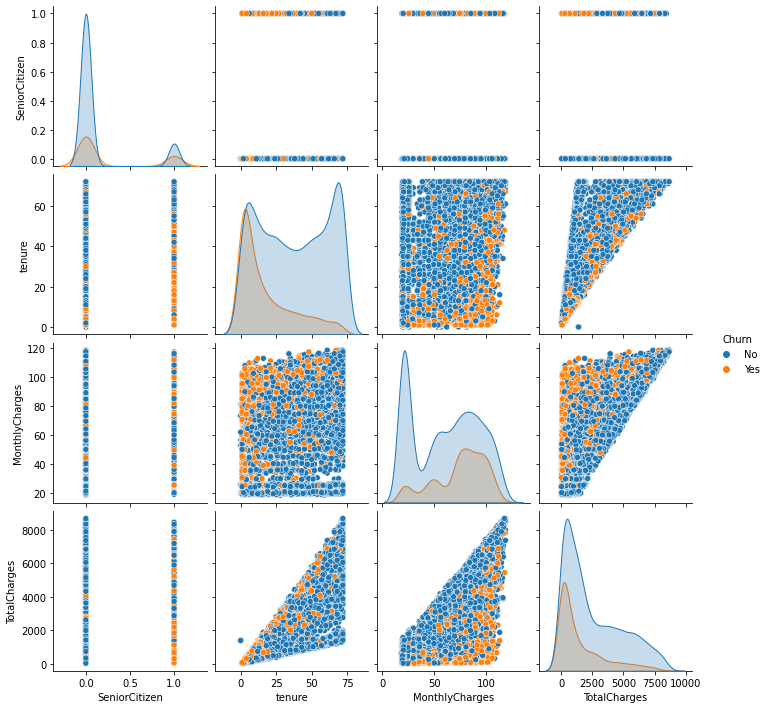

In [190]:
plt.figure(figsize = (50,50))
sns.pairplot(churn_data,hue='Churn')
plt.show()

#Heat map

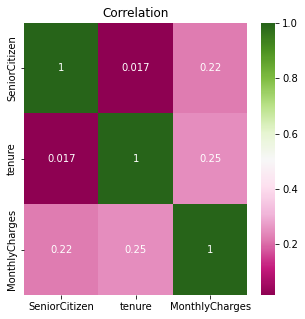

In [191]:
plt.figure(figsize = [5,5])
sns.heatmap(churn_data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

In [192]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [193]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'])
churn_data['MonthlyCharges'] = pd.to_numeric(churn_data['MonthlyCharges'])

In [194]:
for value in range(len(churn_data['TotalCharges'])):
  churn_data['TotalCharges'][value]=int(churn_data['TotalCharges'][value])
  churn_data['MonthlyCharges'][value]=int(churn_data['MonthlyCharges'][value])

churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [195]:
from scipy.stats import zscore
z_score=np.abs(zscore(churn_data[['TotalCharges','MonthlyCharges','tenure']]))

# data with z score more then 3
data=churn_data[(z_score<3).all(axis=1)]
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.0,29.0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.0,1889.0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.0,108.0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.0,1840.0,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.0,151.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.0,1990.0,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.0,7362.0,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.0,346.0,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.0,306.0,Yes


In [196]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [197]:
# Hot Encoding
data['Churn'] = data['Churn'].map({"Yes":int(1),'No':int(0)})

# Convert all non-numeric values to number
column=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in column:
    le =LabelEncoder()
    data[col]=le.fit_transform(data[col].astype('str'))
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [198]:
features =data.drop('Churn', axis=1)
target = data['Churn']

In [199]:
target.unique()

array([0, 1])

In [200]:
features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.0,29.0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.0,1889.0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.0,108.0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.0,1840.0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.0,1990.0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.0,7362.0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.0,346.0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.0,306.0


In [201]:
#skewness in the data
data.drop('Churn',axis=1).skew().sort_values(ascending=False)

SeniorCitizen       1.833633
TotalCharges        0.963785
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220162
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

In [202]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
data_power=pt.fit_transform(features)
data_transformed=pd.DataFrame(data_power,columns=features.columns)
data_transformed.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.302174
OnlineSecurity      0.149362
TechSupport         0.139751
Partner             0.067922
MultipleLines       0.033697
DeviceProtection    0.001051
OnlineBackup       -0.001417
gender             -0.019031
InternetService    -0.072384
StreamingTV        -0.097211
StreamingMovies    -0.105641
TotalCharges       -0.144850
PaymentMethod      -0.207559
tenure             -0.243325
MonthlyCharges     -0.261109
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

In [203]:
data_transformed.drop(['PhoneService','SeniorCitizen','Dependents'],axis=1).skew().sort_values(ascending=False)

Contract            0.302174
OnlineSecurity      0.149362
TechSupport         0.139751
Partner             0.067922
MultipleLines       0.033697
DeviceProtection    0.001051
OnlineBackup       -0.001417
gender             -0.019031
InternetService    -0.072384
StreamingTV        -0.097211
StreamingMovies    -0.105641
TotalCharges       -0.144850
PaymentMethod      -0.207559
tenure             -0.243325
MonthlyCharges     -0.261109
PaperlessBilling   -0.375396
dtype: float64

In [204]:
data_transformed.drop(['PhoneService','SeniorCitizen','Dependents'],axis=1,inplace=True)

# Variance inflation factor (checking for multi-collinearity)


In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(data_transformed.values, i) 
               for i in range(data_transformed.shape[1])], index=data_transformed.columns)

gender               1.001420
Partner              1.177420
tenure              31.378995
MultipleLines        1.312829
InternetService      1.318384
OnlineSecurity       1.325492
OnlineBackup         1.203682
DeviceProtection     1.307290
TechSupport          1.375768
StreamingTV          1.406862
StreamingMovies      1.405305
Contract             2.341111
PaperlessBilling     1.195980
PaymentMethod        1.181623
MonthlyCharges       9.145600
TotalCharges        44.649559
dtype: float64

In [206]:

pd.Series([variance_inflation_factor(data_transformed.drop(['tenure'] ,axis=1).values, i) 
               for i in range(data_transformed.drop(['tenure'] ,axis=1).shape[1])], index=data_transformed.drop(['tenure'] ,axis=1).columns)

gender              1.001413
Partner             1.176266
MultipleLines       1.312085
InternetService     1.215334
OnlineSecurity      1.323446
OnlineBackup        1.203409
DeviceProtection    1.305384
TechSupport         1.370864
StreamingTV         1.406818
StreamingMovies     1.405085
Contract            2.155526
PaperlessBilling    1.194760
PaymentMethod       1.169179
MonthlyCharges      2.713944
TotalCharges        3.613595
dtype: float64

In [207]:
data_transformed.drop(['tenure'] ,axis=1,inplace=True)

In [208]:
# Checking for Imbalace in the data
round(target.value_counts(normalize=True) * 100, 2)

0    73.46
1    26.54
Name: Churn, dtype: float64

In [210]:
# import library
from imblearn.over_sampling import SMOTE
import collections

smote = SMOTE()

# fit predictor and target variable
features_resampled, target_resampled  = smote.fit_resample(data_transformed, target)

print('Original dataset shape', collections.Counter(target))
print('Resample dataset shape', collections.Counter(target_resampled))

Original dataset shape Counter({0: 5174, 1: 1869})
Resample dataset shape Counter({0: 5174, 1: 5174})


In [211]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

#  Model building and evaluation

In [212]:
def Model_Building(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=i)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=accuracy_score(y_train,check)
            
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

# Logistic Regression

In [213]:
Model_Building(features_resampled, target_resampled,LogisticRegression(solver="liblinear"))

Test set accuracy 0.7816425120772947 Train set accuracy 0.7739792220343078 Random state 0 test_size 0.2
Test set accuracy 0.7830917874396135 Train set accuracy 0.7724087943947814 Random state 2 test_size 0.2
Test set accuracy 0.785024154589372 Train set accuracy 0.772287992268664 Random state 20 test_size 0.2
Test set accuracy 0.7898550724637681 Train set accuracy 0.773737617782073 Random state 22 test_size 0.2
Test set accuracy 0.7922705314009661 Train set accuracy 0.7730128050253684 Random state 28 test_size 0.2


Accuracy of Logistic Regression: 79.23%
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1046
           1       0.78      0.81      0.79      1024

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



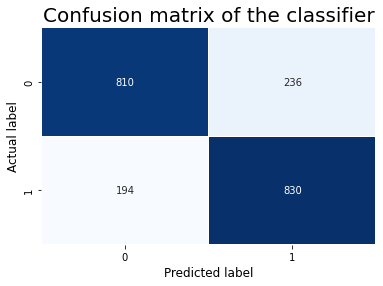

In [221]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=28)
LR =LogisticRegression(solver="liblinear", random_state=1)

LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)

# calculate accuracy score
LR_accuracy = accuracy_score(y_test, pred_LR)
print('Accuracy of Logistic Regression: {:.2f}%'.format(LR_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_LR)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
LR_pred_prob = LR.predict_proba(x_test)[:, 1]
LR_roc_auc = roc_auc_score(y_test, LR_pred_prob)

# KNN Regression

In [214]:
Model_Building(features_resampled, target_resampled,KNeighborsClassifier())

Test set accuracy 0.7985507246376812 Train set accuracy 0.8547958444068615 Random state 0 test_size 0.2
Test set accuracy 0.7995169082125604 Train set accuracy 0.8522589997583957 Random state 34 test_size 0.2
Test set accuracy 0.8024154589371981 Train set accuracy 0.8567286784247403 Random state 54 test_size 0.2
Test set accuracy 0.8048309178743961 Train set accuracy 0.8562454699202706 Random state 81 test_size 0.2


Accuracy of KNN CLASSIFIER: 80.48%
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1006
           1       0.77      0.89      0.82      1064

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



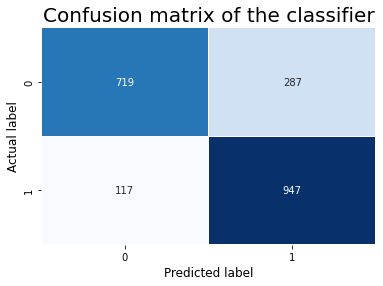

In [222]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=81)
KNN =KNeighborsClassifier()

KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

# calculate accuracy score
KNN_accuracy = accuracy_score(y_test, pred_KNN)
print('Accuracy of KNN CLASSIFIER: {:.2f}%'.format(KNN_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_KNN)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_KNN)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
KNN_pred_prob = KNN.predict_proba(x_test)[:, 1]
KNN_roc_auc = roc_auc_score(y_test, KNN_pred_prob)

# Naive Bayes 

In [215]:
Model_Building(features_resampled, target_resampled,GaussianNB())

Test set accuracy 0.7603864734299517 Train set accuracy 0.7606909881613917 Random state 0 test_size 0.2
Test set accuracy 0.7618357487922706 Train set accuracy 0.7603285817830394 Random state 1 test_size 0.2
Test set accuracy 0.770048309178744 Train set accuracy 0.7580333413868084 Random state 2 test_size 0.2
Test set accuracy 0.7739130434782608 Train set accuracy 0.7569461222517516 Random state 22 test_size 0.2
Test set accuracy 0.7768115942028986 Train set accuracy 0.7563421116211645 Random state 28 test_size 0.2


Accuracy of GUSSIAN NAIVE BAYES: 77.68%
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1046
           1       0.76      0.81      0.78      1024

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



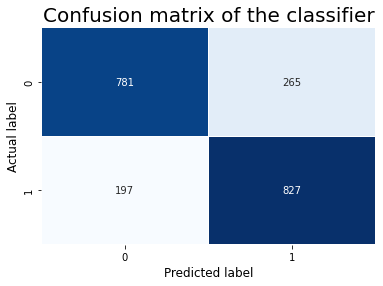

In [223]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=28)
GNB =GaussianNB()

GNB.fit(x_train, y_train)
pred_GNB = GNB.predict(x_test)

# calculate accuracy score
GNB_accuracy = accuracy_score(y_test, pred_GNB)
print('Accuracy of GUSSIAN NAIVE BAYES: {:.2f}%'.format(GNB_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_GNB)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_GNB)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
GNB_pred_prob = GNB.predict_proba(x_test)[:, 1]
GNB_roc_auc = roc_auc_score(y_test, GNB_pred_prob)

# Random Forest Classifier

In [217]:
Model_Building(features_resampled, target_resampled,RandomForestClassifier())

Test set accuracy 0.8483091787439614 Train set accuracy 0.9908190384150761 Random state 0 test_size 0.2
Test set accuracy 0.8507246376811595 Train set accuracy 0.9921478618023677 Random state 1 test_size 0.2
Test set accuracy 0.8516908212560387 Train set accuracy 0.9909398405411936 Random state 3 test_size 0.2
Test set accuracy 0.8599033816425121 Train set accuracy 0.9909398405411936 Random state 4 test_size 0.2
Test set accuracy 0.8666666666666667 Train set accuracy 0.991060642667311 Random state 24 test_size 0.2


Accuracy of RANDOM FOREST: 86.57%
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1040
           1       0.85      0.88      0.87      1030

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



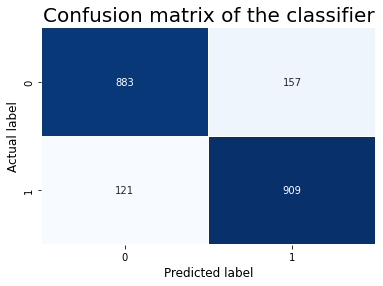

In [224]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=24)
RF =RandomForestClassifier()

RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

# calculate accuracy score
RF_accuracy = accuracy_score(y_test, pred_RF)
print('Accuracy of RANDOM FOREST: {:.2f}%'.format(RF_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_RF)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
RF_pred_prob = RF.predict_proba(x_test)[:, 1]
RF_roc_auc = roc_auc_score(y_test, RF_pred_prob)

# Decision Tree

In [218]:
Model_Building(features_resampled, target_resampled,DecisionTreeClassifier())

Test set accuracy 0.7869565217391304 Train set accuracy 0.9908190384150761 Random state 0 test_size 0.2
Test set accuracy 0.7908212560386474 Train set accuracy 0.9922686639284851 Random state 1 test_size 0.2
Test set accuracy 0.7927536231884058 Train set accuracy 0.9911814447934284 Random state 2 test_size 0.2
Test set accuracy 0.7951690821256039 Train set accuracy 0.9920270596762503 Random state 7 test_size 0.2
Test set accuracy 0.8009661835748793 Train set accuracy 0.991060642667311 Random state 10 test_size 0.2
Test set accuracy 0.8043478260869565 Train set accuracy 0.9915438511717807 Random state 11 test_size 0.2
Test set accuracy 0.8154589371980676 Train set accuracy 0.9905774341628413 Random state 28 test_size 0.2


Accuracy of DECISION TREE: 81.06%
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1046
           1       0.80      0.82      0.81      1024

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



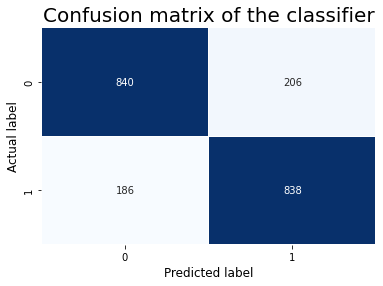

In [225]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=28)
DT =DecisionTreeClassifier()

DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)

# calculate accuracy score
DT_accuracy = accuracy_score(y_test, pred_DT)
print('Accuracy of DECISION TREE: {:.2f}%'.format(DT_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_DT)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_DT)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
DT_pred_prob = DT.predict_proba(x_test)[:, 1]
DT_roc_auc = roc_auc_score(y_test, DT_pred_prob)

# ADA Boost

In [219]:
Model_Building(features_resampled, target_resampled,AdaBoostClassifier())

Test set accuracy 0.8072463768115942 Train set accuracy 0.8116694853829427 Random state 0 test_size 0.2
Test set accuracy 0.8130434782608695 Train set accuracy 0.8096158492389466 Random state 1 test_size 0.2
Test set accuracy 0.8241545893719807 Train set accuracy 0.812031891761295 Random state 2 test_size 0.2
Test set accuracy 0.8304347826086956 Train set accuracy 0.8136023194008215 Random state 28 test_size 0.2


Accuracy of ADA BOOST CLASSIFIER: 81.90%
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1578
           1       0.79      0.87      0.82      1527

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



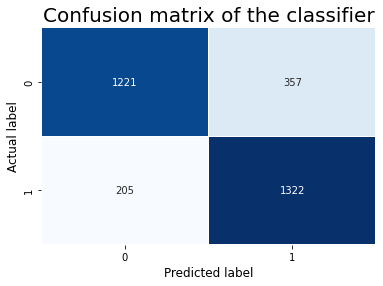

In [226]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.3,random_state=28)
ADA =AdaBoostClassifier()

ADA.fit(x_train, y_train)
pred_ADA = ADA.predict(x_test)

# calculate accuracy score
ADA_accuracy = accuracy_score(y_test, pred_ADA)
print('Accuracy of ADA BOOST CLASSIFIER: {:.2f}%'.format(ADA_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_ADA)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_ADA)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
ADA_pred_prob = ADA.predict_proba(x_test)[:, 1]
ADA_roc_auc = roc_auc_score(y_test, ADA_pred_prob)

# SUPPORT VECTOR CLASSIFIER

In [220]:
def Model_Build(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=42)
    model.fit(x_train,y_train)
    pred= model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    check=model.predict(x_train)
    check_acc=accuracy_score(y_train,check)
            
    if acc>Maximum_Accuracy:
      Maximum_Accuracy=acc
      print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'test_size',j)

Model_Build(features_resampled, target_resampled,SVC())

Test set accuracy 0.8043478260869565 Train set accuracy 0.8261657405170331 test_size 0.2
Test set accuracy 0.8071124855044453 Train set accuracy 0.8270841386419275 test_size 0.25


Accuracy of SUPPORT VECTOR MACHINE: 81.01%
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1041
           1       0.78      0.85      0.82      1029

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



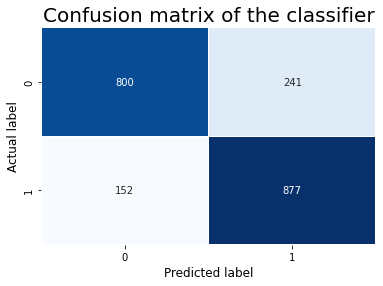

In [227]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled,test_size=0.2)
SVM =SVC()

SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)

# calculate accuracy score
SVM_accuracy = accuracy_score(y_test, pred_SVM)
print('Accuracy of SUPPORT VECTOR MACHINE: {:.2f}%'.format(SVM_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_SVM)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_SVM)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

## SVM DOESNOT SUPPORT AUC CURVE

#COMPARISION OF ROC VALUES

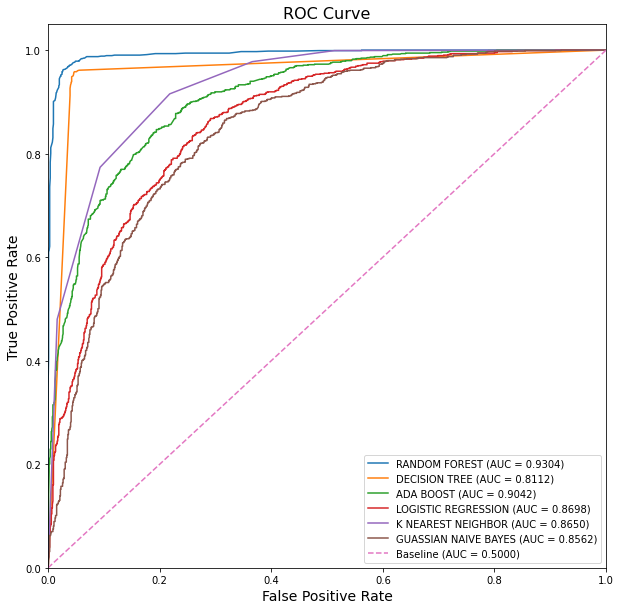

In [228]:
# create ROC curves

from sklearn.metrics import roc_curve
## RANDOM FOREST
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])

## DECISION TREE
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT.predict_proba(x_test)[:,1])

## ADA BOOST
ADA_fpr, ADA_tpr, ADA_thresholds = roc_curve(y_test, ADA.predict_proba(x_test)[:,1])

## LOGISTIC REGRESSION
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

## K NEAREST NEIGHBOUR
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])

## GUASSIAN NAIVE BAYES 
GNB_fpr, GNB_tpr, GNB_thresholds = roc_curve(y_test, GNB.predict_proba(x_test)[:,1])

plt.figure(figsize=(10, 10))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="RANDOM FOREST (AUC = {:1.4f})".format(RF_roc_auc))
plt.plot(DT_fpr, DT_tpr, label="DECISION TREE (AUC = {:1.4f})".format(DT_roc_auc))
plt.plot(ADA_fpr, ADA_tpr, label="ADA BOOST (AUC = {:1.4f})".format(ADA_roc_auc))
plt.plot(LR_fpr, LR_tpr, label="LOGISTIC REGRESSION (AUC = {:1.4f})".format(LR_roc_auc))
plt.plot(KNN_fpr, KNN_tpr, label="K NEAREST NEIGHBOR (AUC = {:1.4f})".format(KNN_roc_auc))
plt.plot(GNB_fpr, GNB_tpr, label="GUASSIAN NAIVE BAYES (AUC = {:1.4f})".format(GNB_roc_auc))


# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [232]:
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=81)
rf = RandomForestClassifier(max_depth=None, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, min_impurity_decrease=0.0, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

param_grid = { 'n_estimators': [100,125,150,175,200,],
              'max_features':['sqrt', None],
              'criterion' : ['gini', 'entropy'],
              'min_samples_split':[2,3],
              'min_samples_leaf':[1,2],
              'bootstrap':[True,False],
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=3)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_

print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

best estimator: RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200)
best params: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best score: 0.9161155060753781


Accuracy of RANDOM FOREST: 85.70%
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1006
           1       0.86      0.87      0.86      1064

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



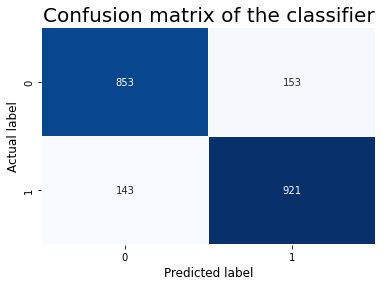

In [233]:
pred_RF = rf_opt.predict(x_test)

# calculate accuracy score
RF_accuracy = accuracy_score(y_test, pred_RF)
print('Accuracy of RANDOM FOREST: {:.2f}%'.format(RF_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_RF)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
RF_pred_prob = RF.predict_proba(x_test)[:, 1]
RF_roc_auc = roc_auc_score(y_test, RF_pred_prob)

In [236]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("customer_churn.pkl","wb") # name of my pickle file , wb -write
pickle.dump(rf_opt, pickle_out)
pickle_out.close()

# loading the pickeled model
pickle_in = open("customer_churn.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

prediction=pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [237]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069
Predicted,0,1,0,0,1,0,1,0,0,0,...,1,1,0,1,0,1,0,0,1,1
Original,0,1,0,1,1,0,1,1,0,1,...,1,1,0,1,1,1,0,0,0,1


In [238]:
prediction.to_csv('prediction.csv', header=False, index=False)

## customer churn Case study completed